# Regresión con Datos Panel

La regresión con datos panel es una técnica estadística que se utiliza en Data Science para analizar datos que se encuentran en un formato de panel o de panel de datos. Los datos panel son una estructura de datos que incluye múltiples observaciones a lo largo del tiempo para un conjunto de individuos o unidades de estudio. Estas unidades pueden ser personas, empresas, países, regiones, etc.

La regresión con datos panel es útil para analizar los efectos de variables explicativas en una variable de interés a lo largo del tiempo y para comparar los efectos entre las unidades de estudio. Se puede utilizar para estudiar el impacto de variables como políticas gubernamentales, condiciones económicas, cambios en la industria, entre otros, en la variable de interés.

La regresión con datos panel tiene en cuenta tanto las diferencias entre las unidades de estudio como las variaciones a lo largo del tiempo. Esto permite una mejor estimación de los efectos de las variables explicativas y una reducción en los errores de medición. Además, la regresión con datos panel permite controlar los efectos de variables no observables que afectan a todas las unidades de estudio de manera similar, como factores culturales, geográficos o históricos.

En resumen, la regresión con datos panel es una técnica importante en Data Science para analizar datos longitudinales y comparar los efectos de variables explicativas en una variable de interés a lo largo del tiempo y entre unidades de estudio.

Para generar el archivo panel_data.csv que se usó en el ejemplo anterior, podemos utilizar el siguiente código en Python:

In [7]:
import pandas as pd
import numpy as np

In [8]:
# Creamos una lista de estados
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

# Creamos una lista de años
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Generamos los datos para cada combinación de estado y año
data = []
for state in states:
    for year in years:
        income = np.random.randint(20000, 100000)
        unemployment_rate = np.random.uniform(3.0, 10.0)
        data.append([state, year, income, unemployment_rate])

# Creamos un DataFrame de pandas con los datos generados
panel_data = pd.DataFrame(data, columns=['state', 'year', 'income', 'unemployment_rate'])

# Guardamos el DataFrame como un archivo CSV
panel_data.to_csv('panel_data.csv', index=False)

Este código generará un archivo CSV llamado panel_data.csv con los datos generados para las combinaciones de estados y años. Los ingresos se generarán aleatoriamente en un rango entre 20000 y 100000, y las tasas de desempleo se generarán aleatoriamente en un rango entre 3 y 10. Los datos se guardarán en un DataFrame de pandas y luego se exportarán a un archivo CSV sin incluir el índice del DataFrame.

## Regresión de DatosPanel

Primero, vamos a importar las librerías necesarias:

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Luego, vamos a cargar nuestro conjunto de datos panel. Supongamos que tenemos datos sobre el ingreso per cápita y la tasa de desempleo en diferentes estados de EE. UU. durante varios años. Nuestro archivo de datos se llama panel_data.csv y tiene las siguientes columnas:

    state: el nombre del estado
    year: el año del dato
    income: el ingreso per cápita en dólares
    unemployment_rate: la tasa de desempleo

Para cargar el archivo de datos, usamos el siguiente código:

In [10]:
panel_data = pd.read_csv('panel_data.csv')

A continuación, vamos a visualizar nuestros datos. Podemos hacer esto utilizando un diagrama de dispersión, donde la variable dependiente (tasa de desempleo) se representa en el eje Y y la variable independiente (ingreso per cápita) se representa en el eje X.

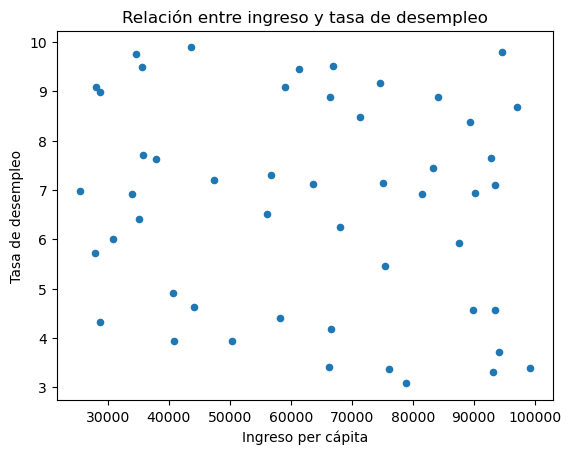

In [11]:
fig, ax = plt.subplots()
panel_data.plot(kind='scatter', x='income', y='unemployment_rate', ax=ax)
ax.set_xlabel('Ingreso per cápita')
ax.set_ylabel('Tasa de desempleo')
ax.set_title('Relación entre ingreso y tasa de desempleo')
plt.show()

El resultado de esta visualización debe mostrar una gráfica de dispersión con puntos para cada estado y año, donde la tasa de desempleo se representa en el eje Y y el ingreso per cápita se representa en el eje X.

Una vez que hemos visualizado nuestros datos, podemos comenzar a ajustar nuestro modelo de regresión con datos panel. Para ello, utilizamos el siguiente código:

In [12]:
# Creamos una variable de índice
panel_data = panel_data.set_index(['state', 'year'])

# Creamos una variable para la variable independiente (ingreso per cápita)
X = sm.add_constant(panel_data['income'])

# Creamos una variable para la variable dependiente (tasa de desempleo)
y = panel_data['unemployment_rate']

# Ajustamos el modelo de regresión con datos panel
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.013
Date:                Tue, 11 Apr 2023   Prob (F-statistic):              0.319
Time:                        19:47:59   Log-Likelihood:                -107.31
No. Observations:                  50   AIC:                             218.6
Df Residuals:                      48   BIC:                             222.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4845      0.862      8.679      0.0

El resultado de la ejecución de este código será la impresión de un resumen del modelo de regresión con datos panel. Podremos ver información como el coeficiente de regresión, el error estándar, el valor t y el valor p para cada variable, así como la bondad del ajuste del modelo, hay muchas maneras de personalizar y ajustar el modelo, y puedes explorar más a fondo la documentación de las librerías que hemos utilizado para comprender mejor cómo funcionan.